<a href="https://colab.research.google.com/github/Athurnm/MachineLearning/blob/master/NLP_Text_Classification_RNN_FF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing Dependencies
# Using Recurrent neural network
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Install for saving model
!pip install h5py pyyaml
!pip install tf_nightly

     |████████████████████████████████| 109.0MB 1.4MB/s 
     |████████████████████████████████| 3.1MB 36.0MB/s 
     |████████████████████████████████| 491kB 53.6MB/s 
     |████████████████████████████████| 61kB 28.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/89/67/41/63cbf0f6ac0a6156588b9587be4db5565f8c6d8ccef98202fc
Successfully built wrapt
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
  Found existing installation: wrapt 1.10.11
    Uninstalling wrapt-1.10.11:
      Successfully uninstalled wrapt-1.10.11


#Data Preparation

In [7]:
# Importing data from drive
from google.colab import files
uploaded = files.upload()

Saving DB INTENT.csv to DB INTENT.csv


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['DB INTENT.csv'].decode('utf-8')))

In [9]:
# Checking data
df.head()

,TEKS_KALIMAT,ID_KONTEKS
0,"bisa dibantu maaf, selamat pagi",33
1,"mbak, saya mau melaporkan ini gangguan telepon",12
2,"sering kali nggak bisa ditelepon, nggak bisa t...",12
3,kan sejak diganti sama ada dikasih modem itu,12
4,iya baik,19


In [10]:
# Load tools we need for preprocessing
# Tokenizer use to tokenize text into words
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['TEKS_KALIMAT'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6691 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['TEKS_KALIMAT'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (21174, 250)


In [12]:
target = pd.get_dummies(df['ID_KONTEKS'].values)
print('Shape of data tensor:', target.shape)

Shape of data tensor: (21174, 42)


##Data Split for Train and Validation

In [0]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, target, test_size=0.2, random_state=1)

#RNN Model
RNN Model will be implemented with LSTM approach to solve vanishing gradient issues

In [0]:
# Instatiate model
model = Sequential()

##Create Model

In [38]:
from keras.layers import Bidirectional

# Input layer with embedding words
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SpatialDropout1D(0.1))

# Hidden layer RNN using LSTM
model.add(Bidirectional(LSTM(100, dropout=0.1, recurrent_dropout=0.1, return_sequences=True)))
model.add(Bidirectional(LSTM(50, dropout=0.1)))

# Output layer 42 class
model.add(Dense(42, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 256

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         5000000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, None, 100)         0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 200)         160800    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100)               100400    
_________________________________________________________________
dense_21 (Dense)             (None, 42)                4242      
Total params: 5,265,442
Trainable params: 5,265,442
Non-trainable params: 0
_________________________________________________________________


## LSTM - with EarlyStopping Model Fit

In [22]:
# using early stopping
history = model.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 13551 samples, validate on 3388 samples
Epoch 1/80
13551/13551 [==============================] - 374s 28ms/step - loss: 2.8358 - acc: 0.2015 - val_loss: 2.6602 - val_acc: 0.2290
Epoch 2/80
13551/13551 [==============================] - 368s 27ms/step - loss: 2.5865 - acc: 0.2505 - val_loss: 2.5318 - val_acc: 0.2748
Epoch 3/80
13551/13551 [==============================] - 367s 27ms/step - loss: 2.4084 - acc: 0.3060 - val_loss: 2.4287 - val_acc: 0.2922
Epoch 4/80
13551/13551 [==============================] - 366s 27ms/step - loss: 2.2615 - acc: 0.3403 - val_loss: 2.3796 - val_acc: 0.3111
Epoch 5/80
13551/13551 [==============================] - 365s 27ms/step - loss: 2.1282 - acc: 0.3797 - val_loss: 2.3571 - val_acc: 0.3297
Epoch 6/80
13551/13551 [==============================] - 359s 27ms/step - loss: 2.0065 - acc: 0.4166 - val_loss: 2.3324 - val_acc: 0.3291
Epoch 7/80
13551/13551 [==============================] - 359s 26ms/step - loss: 1.9118 - acc: 0.4456 - val_loss: 2.3

In [0]:
model.save('NLP_Classification_LSTM_EarlyStopping.h5')

###Evaluate LSTM (RNN Implementation) - with EarlyStopping Model

In [24]:
# Evaluate accuracy with test data chunk
accr = model.evaluate(Xtest,Ytest)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4235/4235 [==============================] - 29s 7ms/step
Test set
  Loss: 2.400
  Accuracy: 0.338


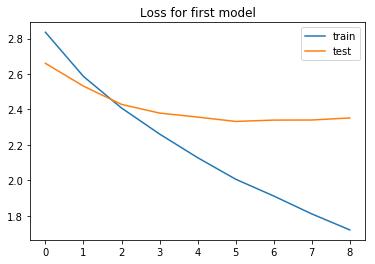

In [25]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the first model loss and validating loss for knowing overfit and underfit
plt.title('Loss for first model')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

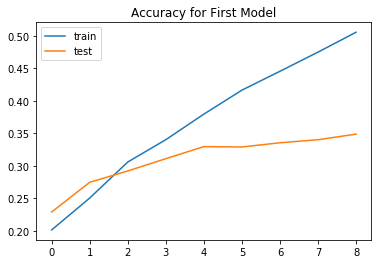

In [26]:
# Plot the first model accuracy and validating accuracy for knowing overfit and underfit
plt.title('Accuracy for First Model')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

## LSTM - without EarlyStopping Model Fit

In [39]:
# without early stopping
history2 = model.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 15245 samples, validate on 1694 samples
Epoch 1/100
15245/15245 [==============================] - 107s 7ms/step - loss: 3.0171 - acc: 0.1817 - val_loss: 2.7567 - val_acc: 0.2031
Epoch 2/100
15245/15245 [==============================] - 99s 7ms/step - loss: 2.7096 - acc: 0.2264 - val_loss: 2.6524 - val_acc: 0.2456
Epoch 3/100
15245/15245 [==============================] - 100s 7ms/step - loss: 2.5907 - acc: 0.2520 - val_loss: 2.5779 - val_acc: 0.2462
Epoch 4/100
15245/15245 [==============================] - 100s 7ms/step - loss: 2.4789 - acc: 0.2776 - val_loss: 2.4939 - val_acc: 0.2727
Epoch 5/100
15245/15245 [==============================] - 99s 7ms/step - loss: 2.3290 - acc: 0.3210 - val_loss: 2.3937 - val_acc: 0.2999
Epoch 6/100
15245/15245 [==============================] - 100s 7ms/step - loss: 2.1779 - acc: 0.3610 - val_loss: 2.3400 - val_acc: 0.3170
Epoch 7/100
15245/15245 [==============================] - 102s 7ms/step - loss: 2.0491 - acc: 0.3951 - val_loss: 2.314

In [0]:
model.save('NLP_Classification_LSTM.h5')

###Evaluate LSTM (RNN Implementation) - without EarlyStopping Model

In [41]:
# Evaluate accuracy with test data chunk
accr = model.evaluate(Xtest,Ytest)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4235/4235 [==============================] - 43s 10ms/step
Test set
  Loss: 3.640
  Accuracy: 0.374


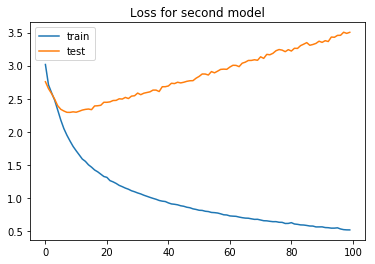

In [43]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the second model loss and validating loss for knowing overfit and underfit
plt.title('Loss for second model')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show();

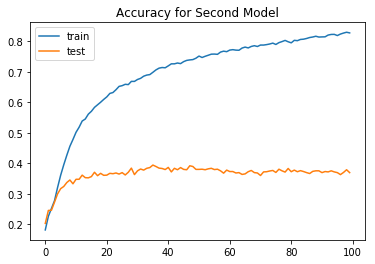

In [44]:
# Plot the second model accuracy and validating accuracy for knowing overfit and underfit
plt.title('Accuracy for Second Model')
plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.legend()
plt.show();

#Feed Forward DNN Model

In [45]:
# Instatiate model
model1 = Sequential()

# Create Model
model1.add(Dense(512, activation='relu', input_shape=(250,)))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(42, activation='softmax'))
model1.summary()

# Build Model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               128512    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
__________

In [0]:
epochs = 100
batch_size = 256

##FFNN - with early stopping fit

In [47]:
history3 = model1.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Train on 13551 samples, validate on 3388 samples
Epoch 1/100
13551/13551 [==============================] - 5s 353us/step - loss: 9.2657 - acc: 0.1322 - val_loss: 4.0534 - val_acc: 0.1576
Epoch 2/100
13551/13551 [==============================] - 0s 26us/step - loss: 4.3575 - acc: 0.1324 - val_loss: 3.3566 - val_acc: 0.1488
Epoch 3/100
13551/13551 [==============================] - 0s 24us/step - loss: 3.3144 - acc: 0.1415 - val_loss: 3.0242 - val_acc: 0.1541
Epoch 4/100
13551/13551 [==============================] - 0s 24us/step - loss: 3.0415 - acc: 0.1566 - val_loss: 2.8990 - val_acc: 0.1733
Epoch 5/100
13551/13551 [==============================] - 0s 23us/step - loss: 2.9310 - acc: 0.1714 - val_loss: 2.8723 - val_acc: 0.1727
Epoch 6/100
13551/13551 [==============================] - 0s 25us/step - loss: 2.8962 - acc: 0.1728 - val_loss: 2.8434 - val_acc: 0.1815
Epoch 7/100
13551/13551 [==============================] - 0s 25us/step - loss: 2.8674 - acc: 0.1786 - val_loss: 2.8206 - 

##Model Evaluation

In [48]:
# Evaluate accuracy with test data chunk
accr = model1.evaluate(Xtest,Ytest)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4235/4235 [==============================] - 0s 47us/step
Test set
  Loss: 2.739
  Accuracy: 0.216


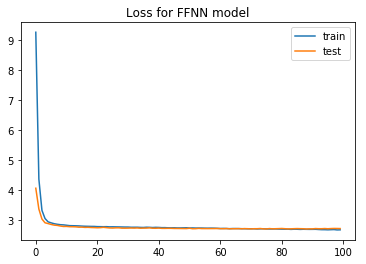

In [49]:
# Plot the FFNN model loss and validating loss for knowing overfit and underfit
plt.title('Loss for FFNN model')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.show();

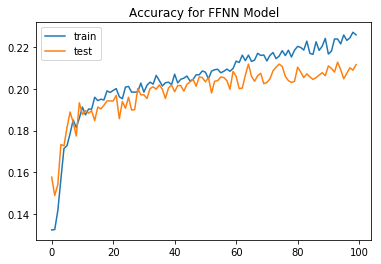

In [50]:
# Plot the FFNN model accuracy and validating accuracy for knowing overfit and underfit
plt.title('Accuracy for FFNN Model')
plt.plot(history3.history['acc'], label='train')
plt.plot(history3.history['val_acc'], label='test')
plt.legend()
plt.show();